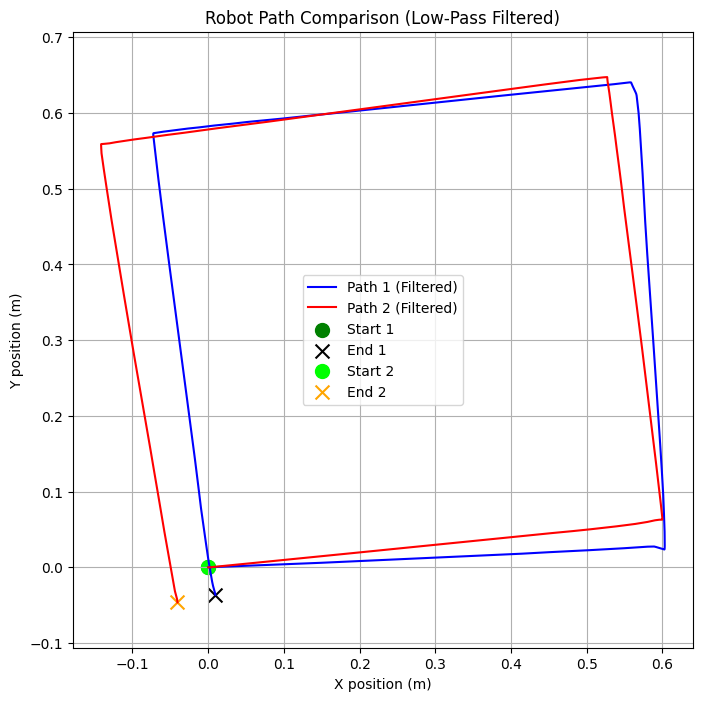

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === ฟังก์ชัน Low-Pass Filter ===
def low_pass_filter(data, alpha=0.05):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# โหลดข้อมูลจากไฟล์แรก
df1 = pd.read_csv("robot_log_17_15_35_P3_I0-3_D12_ramp_ver.csv")
x1_raw = df1['x'].fillna(0).values
y1_raw = df1['y'].fillna(0).values
x1_f = low_pass_filter(x1_raw, alpha=0.05)
y1_f = low_pass_filter(y1_raw, alpha=0.05)

# โหลดข้อมูลจากไฟล์ที่สอง
df2 = pd.read_csv("robot_log_17_17_08_P2_I0-3_D10_ramp_ver.csv")
x2_raw = df2['x'].fillna(0).values
y2_raw = df2['y'].fillna(0).values
x2_f = low_pass_filter(x2_raw, alpha=0.05)
y2_f = low_pass_filter(y2_raw, alpha=0.05)

# Plot การเคลื่อนที่จากทั้งสองไฟล์
plt.figure(figsize=(8, 8))
plt.plot(x1_f, y1_f, label='Path 1 (Filtered)', color='blue')
plt.plot(x2_f, y2_f, label='Path 2 (Filtered)', color='red')

# จุดเริ่มต้น-สิ้นสุด ไฟล์ 1
plt.scatter(x1_f[0], y1_f[0], color='green', s=100, marker='o', label='Start 1')
plt.scatter(x1_f[-1], y1_f[-1], color='black', s=100, marker='x', label='End 1')

# จุดเริ่มต้น-สิ้นสุด ไฟล์ 2
plt.scatter(x2_f[0], y2_f[0], color='lime', s=100, marker='o', label='Start 2')
plt.scatter(x2_f[-1], y2_f[-1], color='orange', s=100, marker='x', label='End 2')

plt.title('Robot Path Comparison (Low-Pass Filtered)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()


/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_3724/1617083406.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=end_markers[i], edgecolor='black', label=f'End {i+1}')
/var/folders/m8/2_pc0xd963q98ds3db325g5h0000gn/T/ipykernel_3724/1617083406.py:43: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=end_markers[i], edgecolor='black', label=f'End {i+1}')


FileNotFoundError: [Errno 2] No such file or directory: 'robot_log_17_15_35_P3_I0-3_D11_ramp_ver.csv'

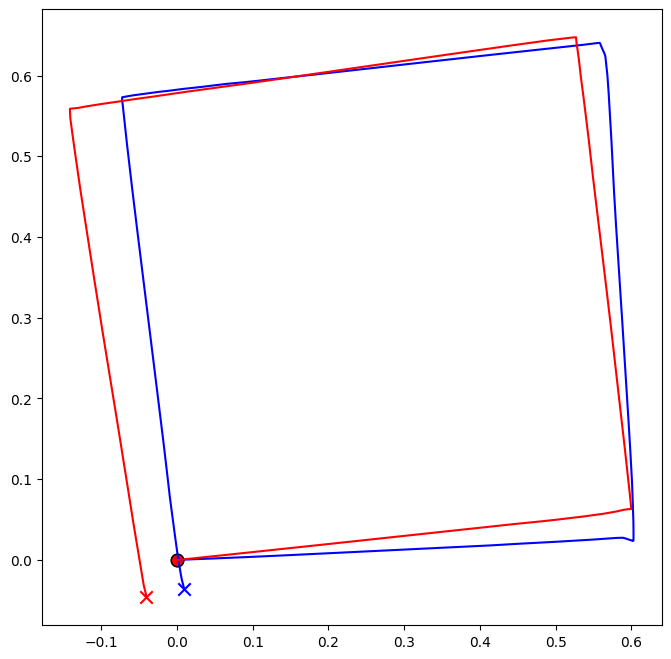

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === ฟังก์ชัน Low-Pass Filter ===
def low_pass_filter(data, alpha=0.05):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# รายชื่อไฟล์ CSV ที่ต้องการเปรียบเทียบ
files = [
    "robot_log_17_15_35_P3_I0-3_D12_ramp_ver.csv",
    "robot_log_17_17_08_P2_I0-3_D10_ramp_ver.csv",
    "robot_log_17_16_28_P2-5_I0-3_D11_ramp_ver.csv",
    
]

# สีและ marker สำหรับแต่ละไฟล์
colors = ['blue', 'red', 'purple', 'orange']
start_markers = ['o', 'o', 'o', 'o']
end_markers = ['x', 'x', 'x', 'x']

plt.figure(figsize=(8, 8))

for i, file in enumerate(files):
    df = pd.read_csv(file)
    x_raw = df['x'].fillna(0).values
    y_raw = df['y'].fillna(0).values
    
    # Low-pass filter
    x_f = low_pass_filter(x_raw, alpha=0.05)
    y_f = low_pass_filter(y_raw, alpha=0.05)
    
    # Plot เส้นทาง
    plt.plot(x_f, y_f, label=f'Path {i+1} (Filtered)', color=colors[i])
    
    # จุดเริ่มต้น
    plt.scatter(x_f[0], y_f[0], color=colors[i], s=80, marker=start_markers[i], edgecolor='black', label=f'Start {i+1}')
    # จุดสิ้นสุด
    plt.scatter(x_f[-1], y_f[-1], color=colors[i], s=80, marker=end_markers[i], edgecolor='black', label=f'End {i+1}')

plt.title('Robot Path Comparison (4 Runs, Low-Pass Filtered)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()
